In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
from PIL import Image

from jubilee_pipette_bodemo.color_matcher import ColorMatcher
from jubilee_pipette_bodemo.in_silico_mixing import synthetic_image
import jubilee_pipette_bodemo.image_processing as image_processing

import requests

# ------ Data visualization outside of the notebook ------
import matplotlib
#matplotlib.use('Qt5Agg')

import io

import torch

In [3]:
RobRoss = ColorMatcher(5, sample_volume=300, score_type='euclidean', in_silico_mixing = True, in_silico_colors = [[255, 0, 0], [255, 255, 0], [0,0,255], [255,255,255], [0,0,0]])

In [4]:
target_color = RobRoss.select_target_color()

ColorPicker(value='blue', description='Pick a color')

http optimizer is asking service
new trial index:  0
query point:  [0.15775907120175608, 0.1360257092549026, 0.3981417862193974, 0.02462297775578696, 0.28345045556815707]
type query pt:  <class 'list'>
RYB values tested: [0.15775907120175608, 0.1360257092549026, 0.3981417862193974, 0.02462297775578696, 0.28345045556815707]
RGB values observed: (67, 43, 90)
color score:  [0.9953216207822558]
type:  <class 'list'>
http optimizer is asking service
new trial index:  1
query point:  [0.3057101834110233, 0.3312756714546775, 0.06962611280651891, 0.08574930227901359, 0.2076387300487667]
type query pt:  <class 'list'>
RYB values tested: [0.3057101834110233, 0.3312756714546775, 0.06962611280651891, 0.08574930227901359, 0.2076387300487667]
RGB values observed: (175, 98, 40)
color score:  [0.9953216207822558, 0.978264357626576]
type:  <class 'list'>
http optimizer is asking service
new trial index:  2
query point:  [0.17046110893712813, 0.08548087782953141, 0.020723294624667685, 0.3311250623987808

KeyboardInterrupt: 

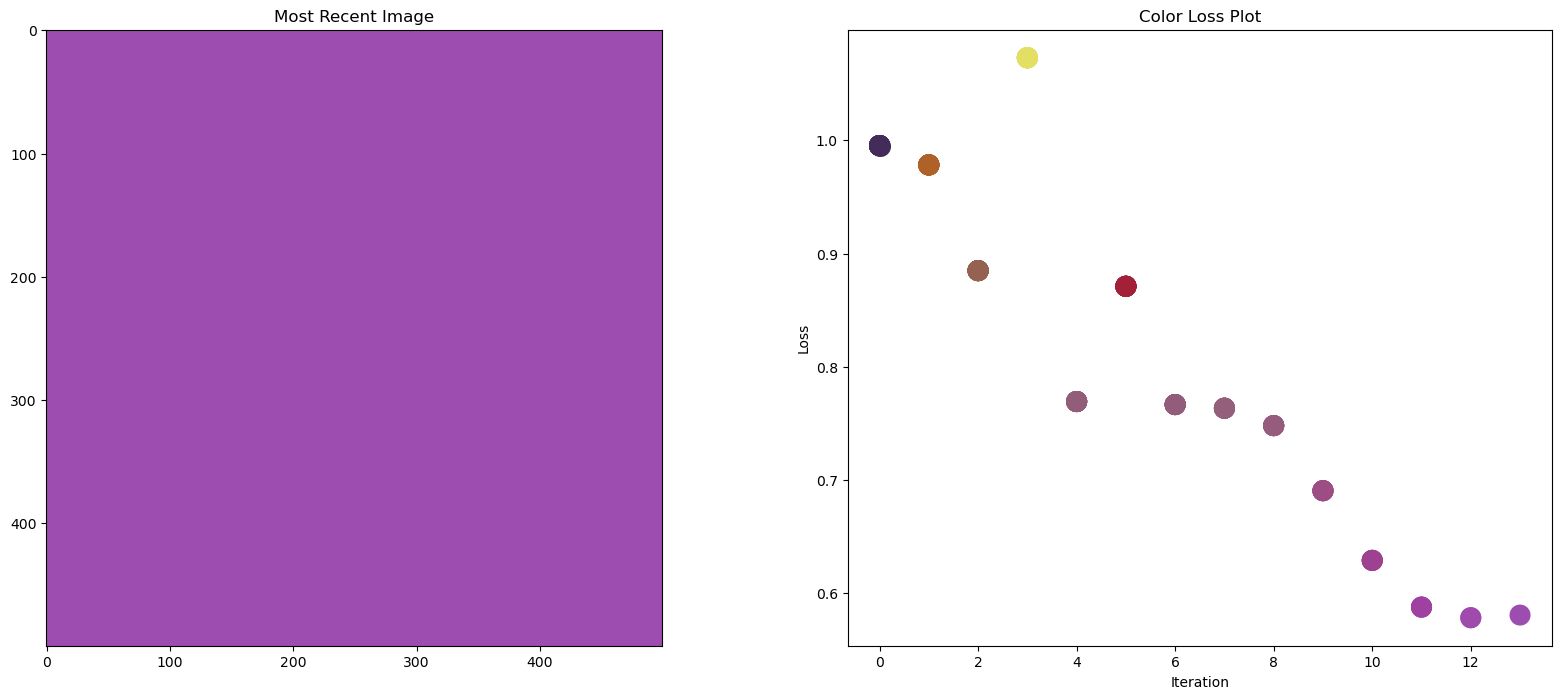

In [5]:
RobRoss.run_campaign(400, None, None, None, None, None, starting_well = 0, save =True)

In [83]:
uid = RobRoss.optimizer.uuid

In [72]:
print(uid)

195210421242463217678503133825522643435


In [73]:
import requests

In [ ]:
r = requests.post('http://localhost:5000/observability_data', json = {'uuid':uid})

In [ ]:
r.status_code

In [ ]:
r.json()

In [88]:
image = r.json()['image']

In [90]:
bimage = image.encode('ascii')

In [91]:
import base64

base64.b64decode(bimage)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\x08\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\xf4\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd